<a href="https://colab.research.google.com/github/XuDou/dive_into_deep_learning_prac/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mxnet-cu100

     |████████████████████████████████| 488.3MB 30kB/s 
     |████████████████████████████████| 13.8MB 29.7MB/s 
ERROR: spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: fastai 1.0.52 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [0]:
import mxnet as mx; mx.__version__

In [0]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
tf.enable_eager_execution()

We want to generate a sythetic dataset according to \\
$\mathbf{y}=\mathbf{X}\mathbf{w}+b+\epsilon$

In [0]:
shape = [1000,2]             #'''1000 data points, two features'''
true_w = np.array([[2], [-3.4]]) #''' the true value of w'''
true_b = 4.2                 #'''the true value of the bias'''
X = tf.Variable(tf.random.normal(
    shape,
    mean=0,
    stddev=1.0,
    dtype=tf.dtypes.float64,
    seed=None,
    name=None
))
epsilon = tf.Variable(tf.random.normal([1000,1],mean=0,stddev=0.01,dtype=tf.dtypes.float64))
label_y = tf.Variable(tf.matmul(X,true_w) + true_b + tf.random.normal([1000,1],mean=0,stddev=0.01,dtype=tf.dtypes.float64))

In [4]:
X.numpy()

array([[-1.04564149,  0.05814104],
       [ 0.45334944,  0.84712352],
       [ 0.77658575,  0.94394262],
       ...,
       [-0.01260637, -0.11663877],
       [ 0.31822316,  0.97059077],
       [ 1.25887613, -0.447311  ]])

In [0]:
label_y;

Instructions for updating:
Colocations handled automatically by placer.


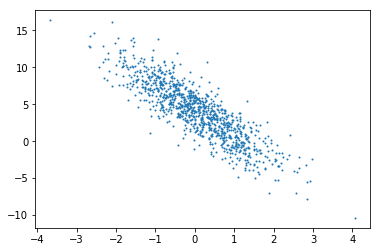

In [5]:
#init = tf.initializers.global_variables()


#with tf.Session() as sess:
 # sess.run(init) 
plt.scatter(X[:,1].numpy(),label_y.numpy(),1)
  
 
  

In [0]:
# Define a loss function

def loss(y_hat,y_predicted):
  return tf.reduce_mean(tf.square(y_hat - y_predicted))

In [0]:
class linear_model():
  def __init__(self):
    self.w = tf.Variable(tf.random.normal(shape = [2],dtype=tf.dtypes.float64))
    self.b = tf.Variable(tf.random.normal(shape= [],dtype=tf.dtypes.float64))
    
  def __call__(self,x):
    return tf.multiply(self.w,x) + self.b
  
  def init_values(self):
    print("w:",self.w.numpy(),"\n","b:",self.b.numpy())
  

In [0]:
model = linear_model()
#model([[1.0,2.0],[1.2,2.3]]).numpy()

In [0]:
a =  tf.Variable([3.1,2])
a.shape

TensorShape([Dimension(2)])

In [8]:
model.init_values()

w: [ 0.62549179 -0.97284061] 
 b: 0.24867671770221345


In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.w, model.b])
    
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
  

In [10]:

# Training!

ws, bs = [], []
epochs = range(30)
for epoch in epochs:
  ws.append(model.w.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(X), label_y)
  
  train(model, X, label_y, learning_rate = 0.1)
  print('Epoch %2d: w=%s b=%.2f, loss=%.3f' %(epoch, ws[-1], bs[-1], current_loss))
  
  


Instructions for updating:
Colocations handled automatically by placer.
Epoch  0: w=[ 0.62549179 -0.97284061] b=0.25, loss=26.514
Epoch  1: w=[ 0.75052857 -1.20798714] b=1.02, loss=20.488
Epoch  2: w=[ 0.86469402 -1.42094033] b=1.64, loss=16.498
Epoch  3: w=[ 0.96875151 -1.61362459] b=2.13, loss=13.838
Epoch  4: w=[ 1.06345256 -1.78783399] b=2.53, loss=12.049
Epoch  5: w=[ 1.14952513 -1.94523257] b=2.85, loss=10.834
Epoch  6: w=[ 1.22766576 -2.08735716] b=3.10, loss=10.000
Epoch  7: w=[ 1.29853436 -2.21562202] b=3.30, loss=9.420
Epoch  8: w=[ 1.36275136 -2.33132464] b=3.47, loss=9.012
Epoch  9: w=[ 1.42089633 -2.43565227] b=3.60, loss=8.721
Epoch 10: w=[ 1.47350786 -2.52968887] b=3.70, loss=8.510
Epoch 11: w=[ 1.52108428 -2.6144222 ] b=3.79, loss=8.356
Epoch 12: w=[ 1.56408496 -2.6907508 ] b=3.86, loss=8.241
Epoch 13: w=[ 1.60293206 -2.75949092] b=3.91, loss=8.155
Epoch 14: w=[ 1.63801253 -2.82138309] b=3.96, loss=8.089
Epoch 15: w=[ 1.66968018 -2.87709841] b=3.99, loss=8.039
Epoch 16:

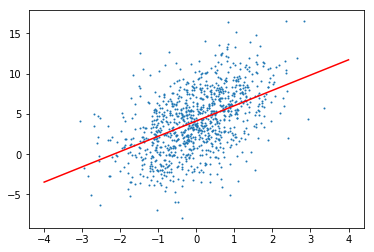

In [19]:
horizontal_0 = range(-4,5)
plt.plot(horizontal_0, model.w.numpy()[0] * horizontal_0 + model.b.numpy(), 'r-')
plt.scatter(X[:,0].numpy(),label_y.numpy(),1)

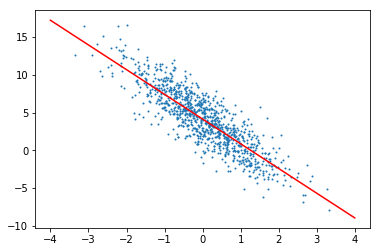

In [18]:
horizontal_1 = range(-4,5)
plt.plot(horizontal_1, model.w.numpy()[1] * horizontal_1 + model.b.numpy(), 'r-')
plt.scatter(X[:,1].numpy(),label_y.numpy(),1)

In [12]:
model.w.numpy()[1]

-3.2743019693976265